# Clustering de Cereales con K-Means

Este proyecto aplica técnicas de clustering mediante el algoritmo K-Means para agrupar cereales según su perfil nutricional, permitiendo identificar segmentos de mercado y estrategias de posicionamiento para diferentes tipos de consumidores.

## Introducción al Método K-Means

K-means es un método de clustering que separa los datos en ‘K’ grupos de objetos (Clusteres) de similar varianza, minimizando la suma de las distancias al cuadrado de cada objeto del Cluster a un punto medio de todos los objetos del clúster, conocido como el centroide.

El objetivo de este análisis es agrupar distintos tipos de cereales según su información nutricional. Disponemos de distintos fabricantes de cereales y buscamos realizar un estudio para identificar a qué tipo de consumidores debería dirigirse cada fabricante, utilizando técnicas de clustering.

La base de datos está formada por 77 cereales distintos con 16 variables nutricionales y de clasificación.


Veámoslas:
* Name: Nombre de los cereales
* Mfr: Fabricante de los cereales
    
    1.	A = American Home Food Products
    2.	G = General Mills
    3.	K = Kelloggs
    4.	N = Nabisco
    5.	P = Post
    6.	Q = Quaker Oats
    7.	R = Ralston Purina 


* Type: Tipo
    1.	C = Cold
    2.	H = Hot


* Calories: Calorías por porción
* Protein: Gramos de proteínas
* Fat: Gramos de grasa
* Sodium: Miligramos de sodio
* Fiber: Gramos de fibra dietética 
* Carbo: Gramos de carbohidratos
* Sugars: Gramos de azúcares
* Potass: Miligramos de potasio
* Vitamins: Vitaminas y minerales. 25 o 100 indica el porcentaje típico de la FDA recomendado. 
* Shelf: Estante de demostración (1, 2 o 3)
* Weight: Peso en onzas de una porción
* Cups: Numero de tazas en una porción
* Rating: La calificación de  los consumidores


### Configuración del Entorno

Comenzamos cargando las librerías necesarias para el análisis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (17, 10)
plt.style.use('ggplot')

### Carga y Exploración Inicial de Datos

Cargamos el dataset y realizamos una primera fase de preprocesamiento para preparar los datos para el análisis.

In [3]:
df = pd.read_csv("cereal.csv")
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


### Selección de Variables para el Clustering

Trabajamos con 3 columnas clave: calorías, azúcares y grasas. Dada la creciente conciencia sobre alimentación saludable, queremos ver cómo se agrupan los cereales respecto a estos tres factores nutricionales.

Definimos nuestra matriz de características X con las columnas de calorías, azúcares y grasas.

In [4]:
X = np.array(df[["calories","sugars","fat"]])
X.shape

(77, 3)

### Determinación del Número Óptimo de Clusters

Aunque por análisis previos sabemos que 3 clusters es una buena opción, aplicamos el método del codo para validar esta elección y visualizar cómo varía la puntuación según el número de clusters.

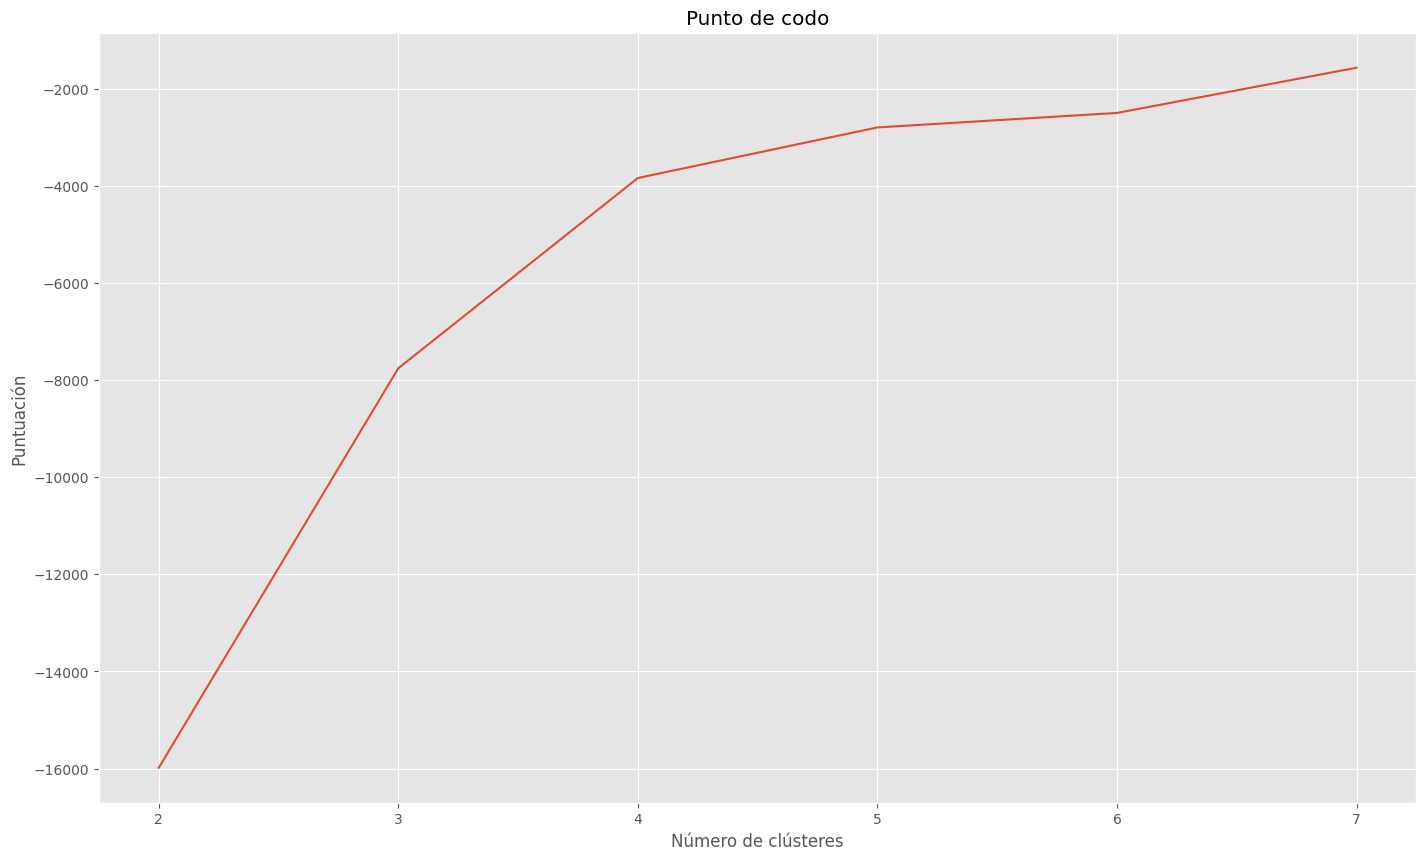

In [5]:
Nc = range(2, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clústeres')
plt.ylabel('Puntuación')
plt.title("Punto de codo")
plt.show()

### Aplicación de K-Means con 3 Clusters

Ejecutamos el algoritmo K-Means para 3 clusters y obtenemos las etiquetas y los centroides. Las posiciones iniciales de los 3 centroides son asignadas de manera aleatoria, por lo que fijamos una semilla aleatoria para reproducibilidad.

In [6]:
# Aplico K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Obtengo centroides y etiquetas
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Centroides:")
print("Cluster 1:", centroids[0])
print("Cluster 2:", centroids[1]) 
print("Cluster 3:", centroids[2])

Centroides:
Cluster 1: [130.          10.22222222   2.        ]
Cluster 2: [61.66666667  1.83333333  0.33333333]
Cluster 3: [104.1509434    6.37735849   0.75471698]


In [ ]:
**Interpretación de los centroides:**

Los centroides obtenidos muestran 3 perfiles nutricionales claramente diferenciados:

- **Cluster "Sabrosos"** (130 cal, 10.2g azúcares, 2g grasas): Cereales orientados al sabor, con mayor contenido calórico y de azúcares.

- **Cluster "Nutritivos"** (61.7 cal, 1.8g azúcares, 0.3g grasas): Cereales enfocados en salud, con valores bajos en calorías, azúcares y grasas.

- **Cluster "Balanceados"** (104.2 cal, 6.4g azúcares, 0.8g grasas): Cereales equilibrados, con valores intermedios en todas las dimensiones.

### Asignación de Etiquetas a los Datos

Cuando se agrupan los datos, se asignan etiquetas a cada cereal para identificar su pertenencia a un cluster específico.

In [7]:
# Añado las etiquetas al dataframe
df['Cluster'] = labels

print("Distribución de cereales por cluster:")
print(df['Cluster'].value_counts())

Distribución de cereales por cluster:
Cluster
2    53
0    18
1     6
Name: count, dtype: int64


In [ ]:
**Distribución de cereales por cluster:**

- **53 cereales "Balanceados"** (68.8%): Domina el mercado el perfil equilibrado, indicando que la mayoría de los productos buscan un equilibrio entre sabor y nutrición.

- **18 cereales "Sabrosos"** (23.4%): Grupo significativo de productos orientados al sabor, posiblemente dirigidos a consumidores que priorizan el gusto sobre aspectos nutricionales.

- **6 cereales "Nutritivos"** (7.8%): Segmento especializado enfocado en salud, representando un nicho de mercado más pequeño pero específico.

### Visualización 3D de los Clusters

Visualizamos cómo se agrupan los 77 tipos de cereales por su información nutricional, considerando las calorías, azúcares y grasas en 3 clusters mediante un gráfico tridimensional.


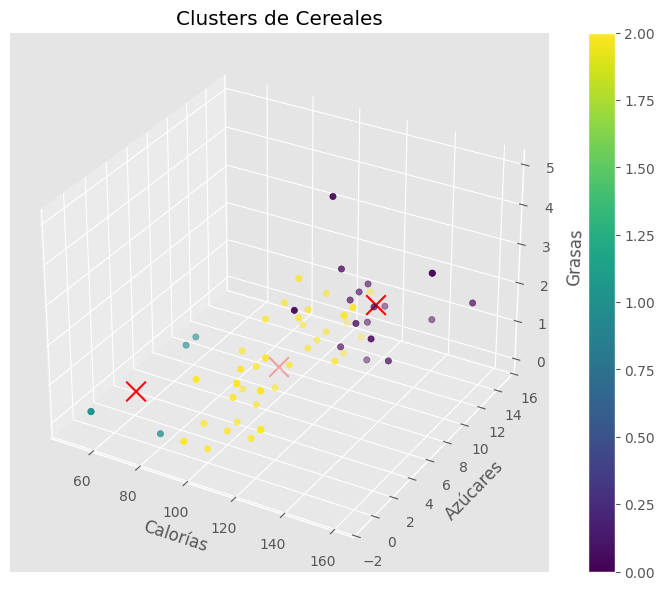

In [8]:
# Gráfico 3D de los clusters
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X[:,0], X[:,1], X[:,2], 
                    c=labels, cmap='viridis')
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], 
           c='red', marker='x', s=200)

ax.set_xlabel('Calorías')
ax.set_ylabel('Azúcares')
ax.set_zlabel('Grasas')
plt.title('Clusters de Cereales')
plt.colorbar(scatter)
plt.show()

In [ ]:
**Observaciones de la visualización 3D:**

- El cluster 2 (amarillo/verde) domina el centro del espacio, representando los cereales balanceados.

- Los clusters 0 (morado) y 1 (verde) ocupan los extremos del espacio, representando perfiles más especializados.

- Los centroides (marcados con X roja) están bien posicionados en el centro de cada grupo, indicando una buena separación de los clusters.

### Visualizaciones Bidimensionales

Realizamos 3 gráficas en 2 dimensiones (calorías vs azúcares, calorías vs grasas, grasas vs azúcares) como proyecciones de nuestra gráfica 3D para facilitar la visualización de los grupos y su clasificación.

Comenzamos con la gráfica entre calorías y azúcares:

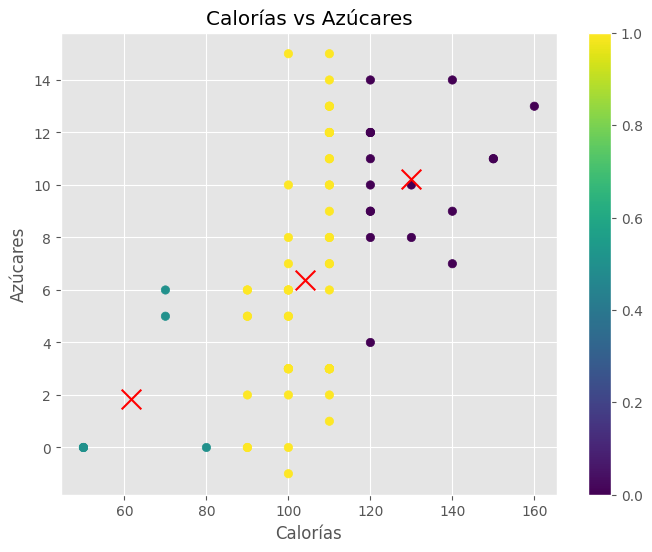

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', s=200)
plt.xlabel('Calorías')
plt.ylabel('Azúcares')
plt.title('Calorías vs Azúcares')
plt.colorbar()
plt.show()

Continuamos con la visualización entre calorías y grasas:

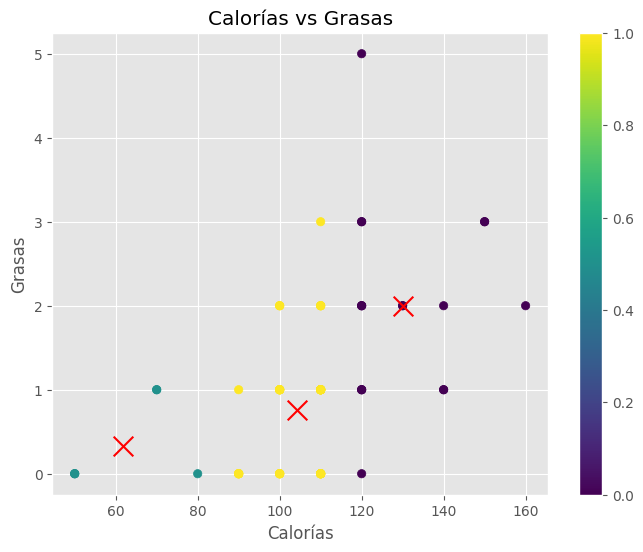

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,2], c=labels, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,2], c='red', marker='x', s=200)
plt.xlabel('Calorías')
plt.ylabel('Grasas')
plt.title('Calorías vs Grasas')
plt.colorbar()
plt.show()

Finalmente, visualizamos la relación entre grasas y azúcares:

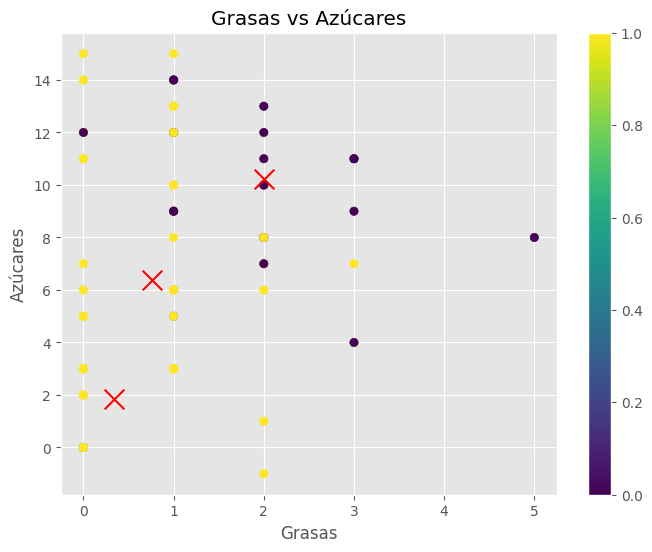

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,2], X[:,1], c=labels, cmap='viridis')
plt.scatter(centroids[:,2], centroids[:,1], c='red', marker='x', s=200)
plt.xlabel('Grasas')
plt.ylabel('Azúcares')
plt.title('Grasas vs Azúcares')
plt.colorbar()
plt.show()

In [ ]:
**Resumen de las visualizaciones bidimensionales:**

- **Calorías vs Azúcares:** Separación moderada entre clusters, con algunos solapamientos, especialmente entre los clusters balanceados y sabrosos.

- **Calorías vs Grasas:** Mejor separación entre clusters, con grupos más definidos. Esta combinación parece ser la más efectiva para diferenciar los perfiles nutricionales.

- **Grasas vs Azúcares:** Mayor solapamiento entre clusters, indicando que esta combinación de variables es menos discriminativa para separar los grupos.

### Evaluación de la Diferenciación de Grupos

In [ ]:
La mejor diferenciación se observa en la gráfica **Calorías vs Grasas** porque:

- Separa claramente los cereales "Sabrosos" (altos en ambos valores), que se concentran en la esquina superior derecha.

- Distingue efectivamente los "Nutritivos" (bajos en ambos valores), ubicados en la esquina inferior izquierda.

- Agrupa coherentemente los "Balanceados" (valores intermedios), ocupando la zona central del gráfico.

Esta combinación de variables proporciona la mejor separación visual y conceptual de los tres perfiles nutricionales identificados.

### Análisis de la Capacidad Discriminativa de las Variables

In [ ]:
**Análisis de la capacidad discriminativa de las variables:**

- **Calorías:** Es el principal diferenciador entre perfiles nutricionales. Los cereales nutritivos tienen significativamente menos calorías que los sabrosos, mientras que los balanceados ocupan un rango intermedio.

- **Grasas:** Ayuda a identificar productos más indulgentes. Los cereales sabrosos tienden a tener mayor contenido de grasas, mientras que los nutritivos y balanceados tienen valores más bajos.

- **Azúcares:** Complementa la caracterización del sabor y la orientación del producto. Aunque útil, muestra mayor solapamiento entre clusters cuando se combina con otras variables, siendo menos discriminativa que las calorías o las grasas.

En conjunto, las tres variables proporcionan una visión completa del perfil nutricional, pero las calorías y las grasas son las más efectivas para la clasificación.

### Aplicaciones del Análisis de Clustering

El análisis de clustering tiene múltiples aplicaciones prácticas en diversos dominios:

In [ ]:
- **Segmentación de clientes:** Agrupar consumidores por hábitos alimenticios, preferencias nutricionales o patrones de compra para personalizar estrategias de marketing.

- **Clasificación de productos:** Organizar productos alimenticios por perfil nutricional para facilitar la toma de decisiones del consumidor y el desarrollo de nuevas líneas de productos.

- **Análisis de patrones de consumo:** Identificar tendencias en el consumo de alimentos saludables para orientar políticas públicas o estrategias empresariales.

- **Desarrollo de productos:** Identificar gaps en el mercado basándose en perfiles nutricionales no cubiertos por productos existentes.

- **Investigación nutricional:** Agrupar alimentos con características similares para estudios epidemiológicos o de salud pública.

Nuevos perfiles de clusters (promedios):

Cluster 0:
Calorías: 118.8
Azúcares: 9.7g
Grasas: 1.4g
Fibra: 1.6g
Proteína: 2.2g
Rating: 33.0

Cluster 1:
Calorías: 61.7
Azúcares: 1.8g
Grasas: 0.3g
Fibra: 6.2g
Proteína: 2.8g
Rating: 68.9

Cluster 2:
Calorías: 99.7
Azúcares: 4.1g
Grasas: 0.6g
Fibra: 2.1g
Proteína: 3.0g
Rating: 50.6

Distribución anterior vs nueva:
   Original  Extendido
0        18         41
1         6          6
2        53         30


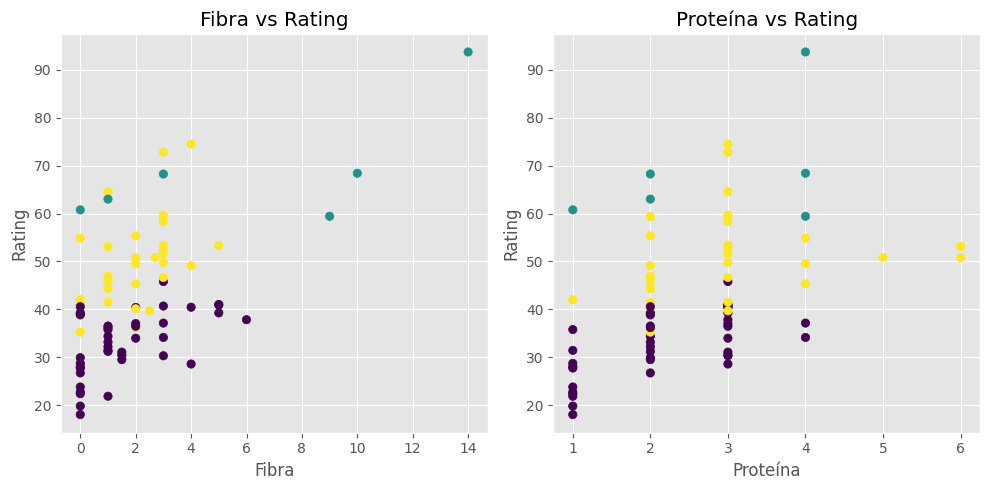

In [ ]:
## Análisis Extendido con Variables Adicionales

Ampliamos el análisis incorporando variables adicionales (fibra, proteína y rating) para obtener una caracterización más completa de los perfiles nutricionales y su relación con la percepción del consumidor.
X_extended = np.array(df[["calories", "sugars", "fat", "fiber", "protein", "rating"]])

# Aplicamos K-means con las nuevas variables
kmeans_ext = KMeans(n_clusters=3, random_state=42)
kmeans_ext.fit(X_extended)

# Obtenemos centroides y etiquetas
centroids_ext = kmeans_ext.cluster_centers_
labels_ext = kmeans_ext.labels_

print("Nuevos perfiles de clusters (promedios):")
for i in range(3):
    print(f"\nCluster {i}:")
    print(f"Calorías: {centroids_ext[i,0]:.1f}")
    print(f"Azúcares: {centroids_ext[i,1]:.1f}g")
    print(f"Grasas: {centroids_ext[i,2]:.1f}g")
    print(f"Fibra: {centroids_ext[i,3]:.1f}g")
    print(f"Proteína: {centroids_ext[i,4]:.1f}g")
    print(f"Rating: {centroids_ext[i,5]:.1f}")

# Comparamos distribución
print("\nDistribución anterior vs nueva:")
print(pd.DataFrame({
    'Original': pd.Series(labels).value_counts(),
    'Extendido': pd.Series(labels_ext).value_counts()
}))

# Visualización de nuevas relaciones
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(X_extended[:,3], X_extended[:,5], c=labels_ext, cmap='viridis')
plt.xlabel('Fibra')
plt.ylabel('Rating')
plt.title('Fibra vs Rating')

plt.subplot(122)
plt.scatter(X_extended[:,4], X_extended[:,5], c=labels_ext, cmap='viridis')
plt.xlabel('Proteína')
plt.ylabel('Rating')
plt.title('Proteína vs Rating')
plt.tight_layout()
plt.show()

In [ ]:
**Análisis de los resultados con variables adicionales:**

Los nuevos resultados revelan cambios significativos en la distribución de clusters y proporcionan insights adicionales:

**Perfiles más detallados:**

- **Cluster "Sabrosos"** (41 cereales, aumentó de 18):
  - Alto en calorías (118.8) y azúcares (9.7g)
  - Bajo en fibra (1.6g) y proteína (2.2g)
  - Rating más bajo (33.0)
  - El aumento sugiere que muchos cereales balanceados se reclasifican como sabrosos al considerar más variables.

- **Cluster "Nutritivos"** (6 cereales, se mantiene):
  - Bajo en calorías (61.7) y azúcares (1.8g)
  - Alto en fibra (6.2g) y proteína (2.8g)
  - Mejor rating (68.9)
  - Mantiene su tamaño, confirmando que es un segmento especializado y bien definido.

- **Cluster "Balanceados"** (30 cereales, disminuyó de 53):
  - Valores intermedios en calorías (99.7) y azúcares (4.1g)
  - Moderado en fibra (2.1g) y proteína (3.0g)
  - Rating intermedio (50.6)
  - La reducción indica que al considerar más variables, algunos cereales se reclasifican.

**Nuevos insights:**

- **Fibra vs Rating:** Existe una correlación positiva clara. Los cereales con más fibra (>8g) tienen los mejores ratings, sugiriendo que los consumidores valoran este nutriente.

- **Proteína vs Rating:** Relación positiva moderada, aunque con mayor dispersión que con la fibra. Los cereales nutritivos destacan por su mejor rating.

- **Impacto en el rating:** Los cereales nutritivos obtienen ratings significativamente más altos (68.9 vs 33.0), indicando que los consumidores valoran productos saludables.


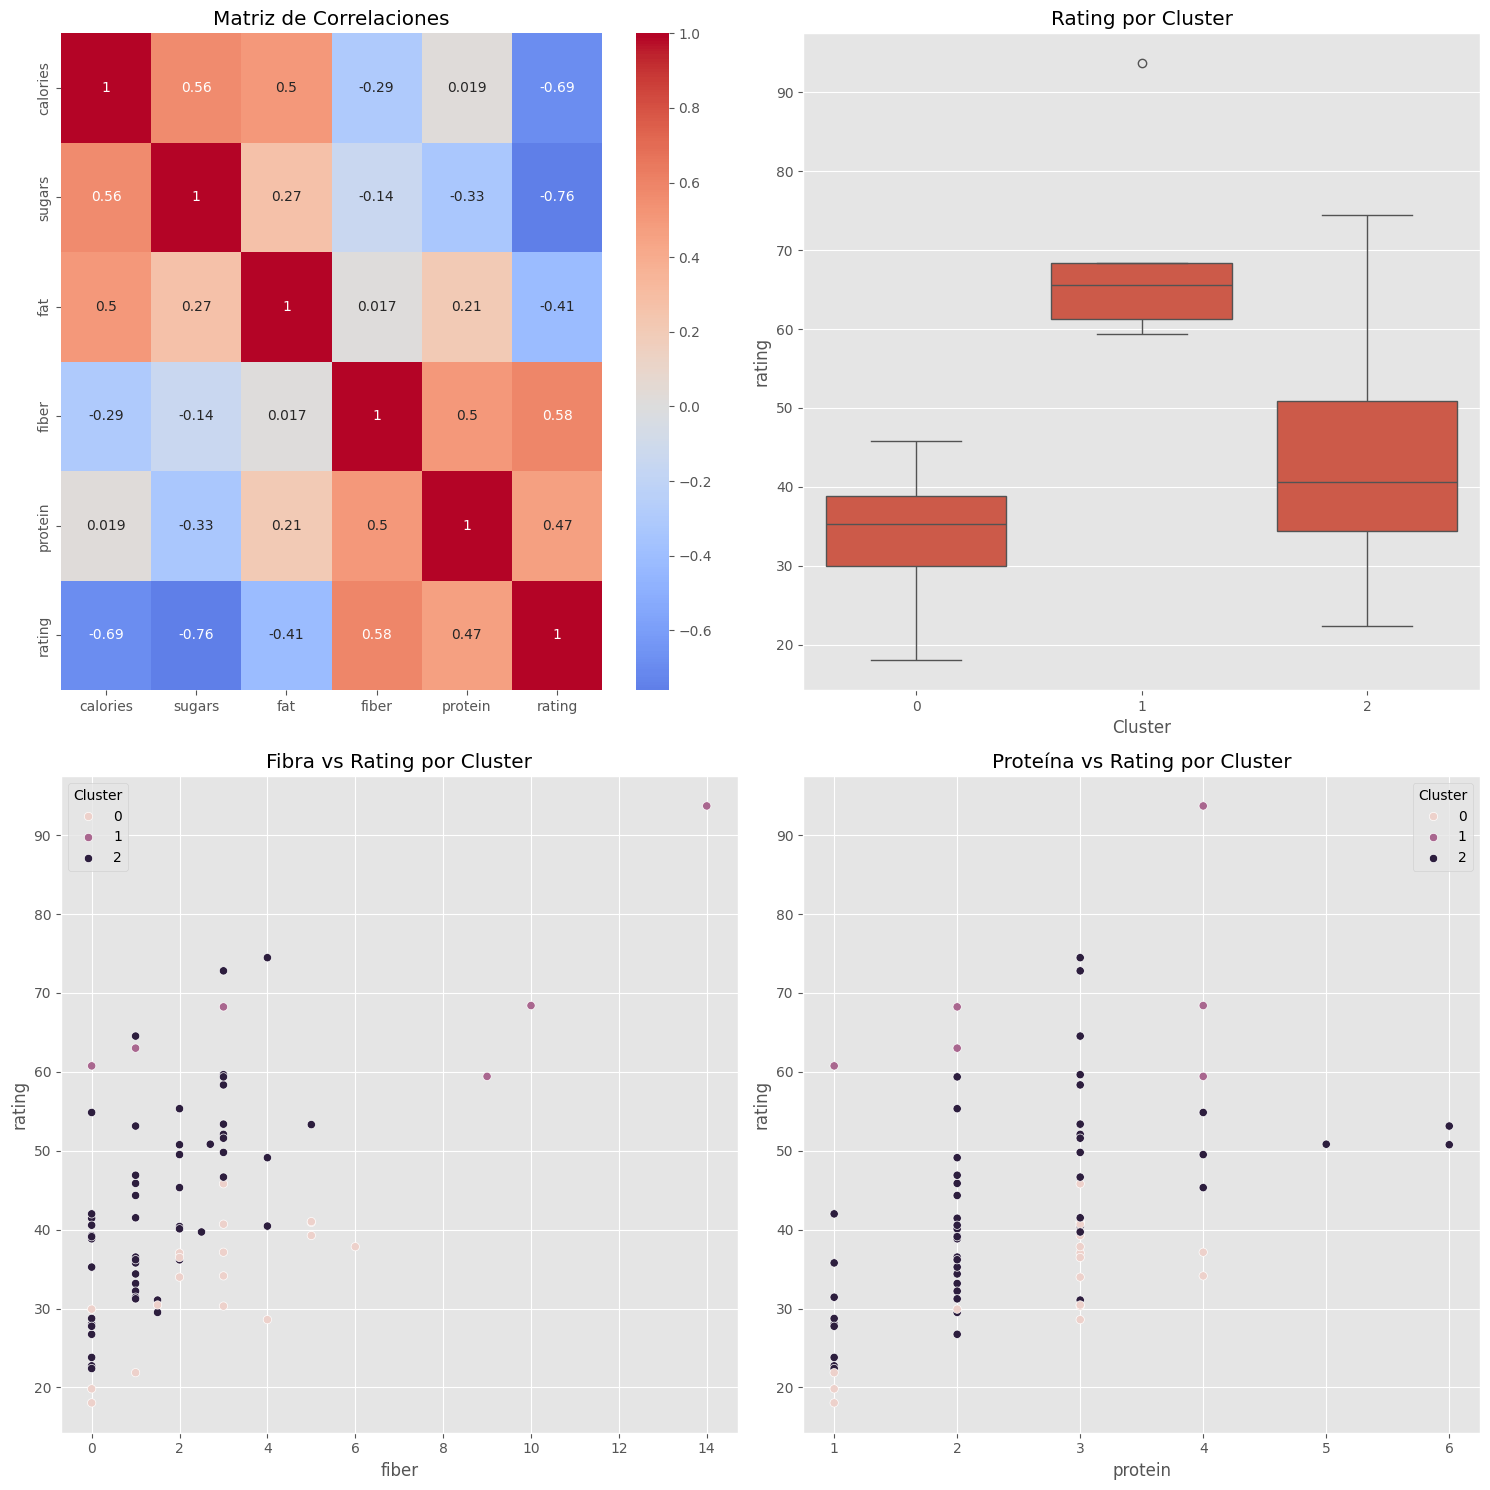


Estadísticas por cluster:

Cluster 0 - Sabrosos:
       fiber  protein  rating
count  18.00    18.00   18.00
mean    2.69     2.72   33.52
std     1.82     0.89    7.74
min     0.00     1.00   18.04
25%     1.62     3.00   30.02
50%     3.00     3.00   35.31
75%     3.75     3.00   38.90
max     6.00     4.00   45.81

Cluster 1 - Nutritivos:
       fiber  protein  rating
count   6.00     6.00    6.00
mean    6.17     2.83   68.92
std     5.64     1.33   12.70
min     0.00     1.00   59.43
25%     1.50     2.00   61.32
50%     6.00     3.00   65.62
75%     9.75     4.00   68.36
max    14.00     4.00   93.70

Cluster 2 - Balanceados:
       fiber  protein  rating
count  53.00    53.00   53.00
mean    1.51     2.45   42.80
std     1.34     1.14   12.03
min     0.00     1.00   22.40
25%     0.00     2.00   34.38
50%     1.00     2.00   40.56
75%     2.70     3.00   50.83
max     5.00     6.00   74.47


In [14]:
#  Análisis con variables adicionales - Visualización mejorada
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# 1. Correlaciones
correlations = df[['calories', 'sugars', 'fat', 'fiber', 'protein', 'rating']].corr()
sb.heatmap(correlations, annot=True, cmap='coolwarm', center=0, ax=axes[0,0])
axes[0,0].set_title('Matriz de Correlaciones')

# 2. Distribución de Rating por Cluster
sb.boxplot(data=df, x='Cluster', y='rating', ax=axes[0,1])
axes[0,1].set_title('Rating por Cluster')

# 3. Relación Fibra-Rating con clusters
sb.scatterplot(data=df, x='fiber', y='rating', hue='Cluster', ax=axes[1,0])
axes[1,0].set_title('Fibra vs Rating por Cluster')

# 4. Relación Proteína-Rating con clusters
sb.scatterplot(data=df, x='protein', y='rating', hue='Cluster', ax=axes[1,1])
axes[1,1].set_title('Proteína vs Rating por Cluster')

plt.tight_layout()
plt.show()

# Estadísticas descriptivas por cluster
print("\nEstadísticas por cluster:")
for cluster in range(3):
    print(f"\nCluster {cluster} - {'Sabrosos' if cluster == 0 else 'Nutritivos' if cluster == 1 else 'Balanceados'}:")
    stats = df[df['Cluster'] == cluster][['fiber', 'protein', 'rating']].describe()
    print(stats.round(2))

In [ ]:
**Conclusiones del análisis extendido:**

1. **La fibra es el nutriente más valorado:** Los cereales con mayor contenido de fibra obtienen los mejores ratings, indicando una fuerte preferencia del consumidor por este nutriente.

2. **Los azúcares tienen impacto negativo:** Un alto contenido de azúcares está asociado con ratings más bajos, sugiriendo que los consumidores son conscientes y evitan productos con exceso de azúcar.

3. **La proteína tiene influencia moderada:** Aunque positiva, la proteína tiene menor impacto en el rating que la fibra, pero sigue siendo un factor relevante.

4. **Perfil del cereal exitoso:** Los cereales más exitosos combinan:
   - Alto contenido de fibra
   - Bajo contenido de azúcares
   - Calorías moderadas
   - Proteína adecuada

Estos hallazgos proporcionan guías claras para el desarrollo de nuevos productos y estrategias de posicionamiento en el mercado de cereales.